# Data Analysis with Statsitics-Canada
***
We will analyze the Canadian population living under the poverty-line by family-classes, using data (CSV) from the Govt. site *Statistics-Canada*:  https://www150.statcan.gc.ca/n1/daily-quotidien/190226/t002b-eng.htm

#### Raw data from STATCAN.gc.ca

In [1]:
import pandas as pd

# View the dataframe in Pandas
raw_poverty_df = pd.read_csv('https://www150.statcan.gc.ca/n1/daily-quotidien/190226/t002b-eng.csv')
raw_poverty_df

,,,,,,,,,,"Table 2 – Persons living below Canada's official poverty line (Market Basket Measure), 2013 to 2017"
,2013,2014,2015,2016,2017,2013,2014,2015,2016,2017
NaN,thousands,thousands,thousands,thousands,thousands,% of all persons,% of all persons,% of all persons,% of all persons,% of all persons
All persons,4167,3910,4238,3739,3412,12.1,11.3,12.1,10.6,9.5
Persons under 18 years{1},974,836,900,755,622,14.5,12.4,13.3,11.0,9.0
In two-parent families,598,467,585,429,386,10.8,8.3,10.3,7.6,6.8
In female lone-parent families,310,292,252,288,185,41.2,41.9,36.4,37.3,27.1
Persons 18 to 64 years,2974,2831,3049,2701,2553,13.3,12.6,13.4,11.9,11.1
In economic families,1667,1522,1622,1342,1307,9.0,8.2,8.7,7.2,6.9
Not in an economic family,1307,1309,1427,1359,1246,33.4,33.0,35.8,33.8,31.3
Persons 65 years and older,219,242,289,284,238,4.2,4.5,5.1,4.9,3.9


## Sanitizing our Data
Seeing that the Dataframe's Index lists family-classes of people in poverty, with year-statistics presented in columns from 2013 to 2017, we can clean our data and visualize it (as a Bar-plot and more).

In [2]:
# Drop NaN values -> Include percentage columns -> Set back index on the categorical groups of people 
df_no_nan = raw_poverty_df.index.dropna().to_frame().iloc[:,:-1].set_index(0)

# Adjust the header to have the years (first-row)
new_header = df_no_nan.iloc[0] 
CAD_poverty_df = df_no_nan[1:] 
CAD_poverty_df.columns = new_header

#Transpose the dataframe to have an appropriate Bar-Plot structure
CAD_poverty_df = CAD_poverty_df.iloc[:,:-3].T 
CAD_poverty_df = CAD_poverty_df.apply(pd.to_numeric) #Convert data-types to Numeric

CAD_poverty_df

,All persons,Persons under 18 years{1},In two-parent families,In female lone-parent families,Persons 18 to 64 years,In economic families,Not in an economic family,Persons 65 years and older,In economic families,Not in an economic family
,,,,,,,,,,
2013,4167,974,598,310,2974,1667,1307,219,79,140
2014,3910,836,467,292,2831,1522,1309,242,92,151
2015,4238,900,585,252,3049,1622,1427,289,96,193
2016,3739,755,429,288,2701,1342,1359,284,111,172
2017,3412,622,386,185,2553,1307,1246,238,97,141


## Visualizing the Data 
As a Bar-plot:

<Figure size 432x288 with 0 Axes>

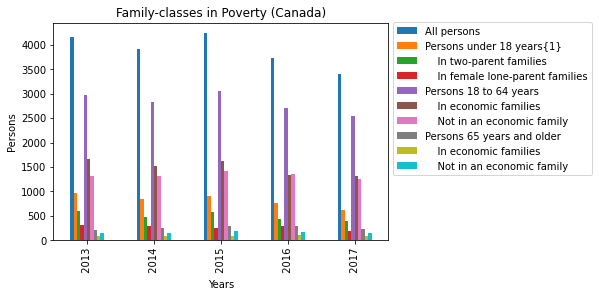

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure()

#Pandas bar plot
CAD_poverty_viz = CAD_poverty_df.plot.bar()

CAD_poverty_viz.set_xlabel("Years") #X-label
CAD_poverty_viz.set_ylabel("Persons") #Y-label
CAD_poverty_viz.set_title("Family-classes in Poverty (Canada)") # Title

# Put Legend outside of graph (avoid obstructions)
CAD_poverty_viz.legend(loc='center left',bbox_to_anchor=(1.0, 0.65))

plt.show()